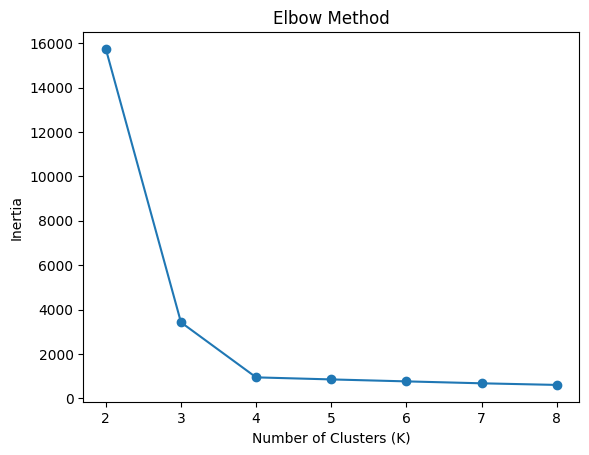

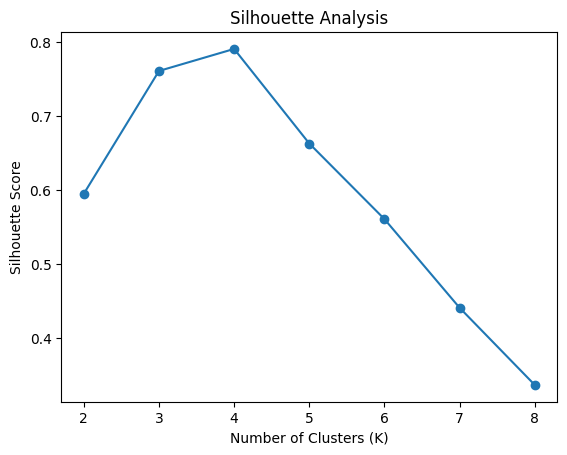

Optimal number of clusters (K): 4
Final Silhouette Score: 0.7911042588289479


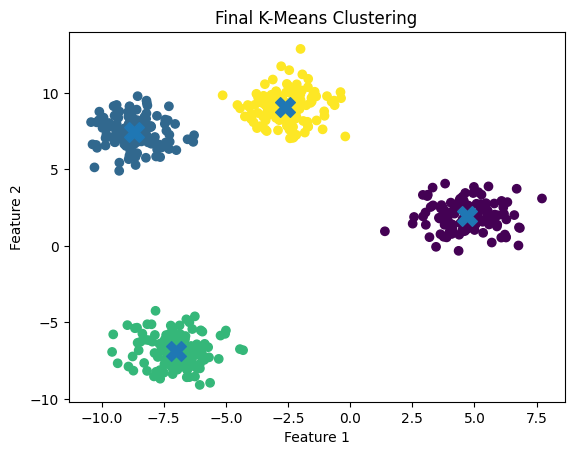

In [1]:
# ==============================
# 1. Import required libraries
# ==============================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ==============================
# 2. Generate synthetic dataset
# ==============================
X, y_true = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

# ==============================
# 3. Find optimal K using Elbow & Silhouette
# ==============================
k_range = range(2, 9)
inertia = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=10,
        random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# ==============================
# 4. Plot Elbow Method (Inertia)
# ==============================
plt.figure()
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# ==============================
# 5. Plot Silhouette Scores
# ==============================
plt.figure()
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# ==============================
# 6. Select optimal K
# ==============================
optimal_k = k_range[np.argmax(silhouette_scores)]
print("Optimal number of clusters (K):", optimal_k)

# ==============================
# 7. Final K-Means clustering
# ==============================
final_kmeans = KMeans(
    n_clusters=optimal_k,
    init='k-means++',
    n_init=10,
    random_state=42
)

labels = final_kmeans.fit_predict(X)

# ==============================
# 8. Final Silhouette Score
# ==============================
final_silhouette = silhouette_score(X, labels)
print("Final Silhouette Score:", final_silhouette)

# ==============================
# 9. Scatter plot of clustered data
# ==============================
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(
    final_kmeans.cluster_centers_[:, 0],
    final_kmeans.cluster_centers_[:, 1],
    s=200,
    marker='X'
)
plt.title('Final K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()